# Ej 60

Si decimos que un usuario sabe un idioma cuando tiene un nivel de babel mayor o
igual a 1, para aquellos que editaron una de las versiones actuales del contenido,
¿Cuál es la cantidad de agradecimientos promedio que reciben en función de los
idiomas que saben?

## Supuestos

* `contents.csv` contiene la ultima version editada del contenido.
* `contents.csv` no tiene publicaciones repetidas, porque de haber habrian 2 ultimas modificaciones y no tiene sentido.
* Unicamente se tomaran en cuenta el registro de usuarios que editaron una de las versionas actuales del contenido.
* Un usuario puede saber multiples idiomas siempre que su nivel de babel sea mayor o igual a 1 para cada idioma.
* Si el usuario no esta en `language.csv`, se considera que sabe 0 idiomas.

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

# 1. Obtengo los usuarios que editaron las ultimas versiones

Obtengo el `user_ID` o `user_name` de cada usuario que edito la version mas reciente y elimino aquellos que no esten registrados.

In [2]:
usuarios_editaron_version_actual = pd.read_csv('./Wikipedia_dataset_2c2021/contents.csv', \
                          usecols=['revisor_id','revisor_username'])

In [3]:
usuarios_editaron_version_actual.dropna(inplace=True)
display(usuarios_editaron_version_actual)

,revisor_username,revisor_id
0,Metrónomo,"1,708,233.00"
2,Traitrich,"4,642,283.00"
3,Lojwe,"5,338,508.00"
4,Jialxv,"3,615,366.00"
5,PatriHorrillo,"689,866.00"
...,...,...
4132159,Copydays,"474,907.00"
4132160,Crls9011,"4,032,712.00"
4132161,Gabriel Solo,"158,577.00"
4132162,Términus,"5,429,951.00"


# 2. Agrego el numero de idiomas que domina cada usuario

Se considera que un usuario domina un idioma si su babel_level >= 1.

Los usuarios pueden dominar mas de un idioma, sin embargo solo se cuenta cada lenguaje con babel_level >= 1.

Si no domina ningun lenguaje se asume que domina 0 idiomas.

In [4]:
languages_df = pd.read_csv('./Wikipedia_dataset_2c2021/languages.csv')
display(languages_df)

,babel_user,babel_lang,babel_level
0,4502458,FR,2
1,5928200,aa,0
2,46918,ab,0
3,2050449,ab,1
4,4715583,ace,0
...,...,...,...
35661,2089885,zh-Hant-HK,1
35662,2089885,zh-Hant-TW,3
35663,5036533,zu,0
35664,5928200,zu,0


## Preprocesamiento de los datos

### 2.1 Elimino los datos invalidos del Database

In [5]:
languages_df.isnull().sum()

babel_user     0
babel_lang     4
babel_level    0
dtype: int64

In [6]:
languages_df.dropna(inplace=True)

In [7]:
languages_df.isnull().sum()

babel_user     0
babel_lang     0
babel_level    0
dtype: int64

### 2.2 Reemplazo todas las N por 0

In [8]:
languages_df.isin(['N']).sum()

babel_user         0
babel_lang         0
babel_level    11533
dtype: int64

In [9]:
languages_df['babel_level'].replace('N',0, inplace=True)

In [10]:
languages_df.isin(['N']).sum()

babel_user     0
babel_lang     0
babel_level    0
dtype: int64

### 2.3 Ahora puedo convertir el nivel de babel a numerico

In [11]:
languages_df['babel_level'] = pd.to_numeric(languages_df['babel_level'])

### Cuento la cantidad de idiomas que domina cada usuario


In [12]:
usr_con_idiomas = languages_df[languages_df['babel_level']>=1].groupby('babel_user').\
                                        agg(cant_idiomas = ('babel_lang','count') )

display(usr_con_idiomas)

,cant_idiomas
babel_user,
30,8
38,1
262,3
267,3
294,5
...,...
6318249,1
6327193,1
6327824,2


# Agrego el nivel numero de idiomas que domina cada usuario

Si un usuario no domina ningun idioma, se reemplaza el valor  de nan por 0.

In [13]:
user_data = usuarios_editaron_version_actual.\
                                merge(usr_con_idiomas, how='left', left_on='revisor_id', right_index=True)

display(user_data)

,revisor_username,revisor_id,cant_idiomas
0,Metrónomo,"1,708,233.00",NaN
2,Traitrich,"4,642,283.00",3.00
3,Lojwe,"5,338,508.00",NaN
4,Jialxv,"3,615,366.00",3.00
5,PatriHorrillo,"689,866.00",2.00
...,...,...,...
4132159,Copydays,"474,907.00",2.00
4132160,Crls9011,"4,032,712.00",NaN
4132161,Gabriel Solo,"158,577.00",NaN
4132162,Términus,"5,429,951.00",NaN


In [14]:
user_data.replace(np.nan, 0, inplace=True)

# 3. Lista de Usuarios a los que les agradecieron

In [15]:
logs = pd.read_csv('./Wikipedia_dataset_2c2021/logs.csv', usecols=['action', 'title'])

In [16]:
usuarios_agradecidos = logs.groupby('action').get_group('thank')
display(usuarios_agradecidos)

,action,title
5089429,thank,Usuario:Isha
5089430,thank,Usuario:Osado
5089443,thank,Usuario:Fabrice Florin
5089554,thank,Usuario:Sala Zero
5089560,thank,Usuario:StockZXD
...,...,...
12188876,thank,Usuario:Tector
12188903,thank,Usuario:Latothy99
12188905,thank,Usuario:JulioW4rrior00
12188919,thank,Usuario:Alpinu


In [17]:
usuarios_agradecidos['usuario'] = usuarios_agradecidos['title'].map(lambda x: str(x)[8:])
usuarios_agradecidos.drop(columns=['title'], inplace=True)
display(usuarios_agradecidos)

,action,usuario
5089429,thank,Isha
5089430,thank,Osado
5089443,thank,Fabrice Florin
5089554,thank,Sala Zero
5089560,thank,StockZXD
...,...,...
12188876,thank,Tector
12188903,thank,Latothy99
12188905,thank,JulioW4rrior00
12188919,thank,Alpinu


In [18]:
usuarios_agradecidos = usuarios_agradecidos.groupby('usuario').agg(cant_agradecimientos = ('action','count') )
display(usuarios_agradecidos)

,cant_agradecimientos
usuario,
,1
"""viviapari1981""",1
&beer&love,59
(Carlos Emanuel),1
(MCQ),3
...,...
愛羅武委内瑞拉野球,1
松茸取りの翁,1
白拍子花子,1


## Agrego los agradecimientos que reciben los usuario

Unicamente considero los usuarios que editaron una de las versiones actuales del contenido. Es decir los que estan en `contents.csv`.

Si un usuario no recibio no recibio agradecimiento, reemplazo el Nan por 0.

In [19]:
user_data = user_data.merge(usuarios_agradecidos, how='left', left_on='revisor_username', right_index=True)
display(user_data)

,revisor_username,revisor_id,cant_idiomas,cant_agradecimientos
0,Metrónomo,"1,708,233.00",0.00,489.00
2,Traitrich,"4,642,283.00",3.00,30.00
3,Lojwe,"5,338,508.00",0.00,116.00
4,Jialxv,"3,615,366.00",3.00,100.00
5,PatriHorrillo,"689,866.00",2.00,198.00
...,...,...,...,...
4132159,Copydays,"474,907.00",2.00,182.00
4132160,Crls9011,"4,032,712.00",0.00,13.00
4132161,Gabriel Solo,"158,577.00",0.00,12.00
4132162,Términus,"5,429,951.00",0.00,19.00


In [20]:
user_data.replace(np.nan, 0, inplace=True)

# 4. Estadísticas

Una vez determinado los datos, determino la cantidad de agradecimientos promedio que reciben en función de los idiomas que saben

In [21]:
estadisticas_usuarios = user_data.groupby('cant_idiomas').agg(total_agradecimientos = ('cant_agradecimientos','sum'),
                                                                cant_usuarios = ('revisor_username','count') 
                                                             )

display(estadisticas_usuarios)

,total_agradecimientos,cant_usuarios
cant_idiomas,,
0.00,"461,989,705.00",3154405
1.00,"26,561,800.00",170047
2.00,"54,814,955.00",252446
3.00,"57,328,617.00",148244
4.00,"21,872,762.00",95896
5.00,"7,004,329.00",37759
6.00,"4,232,168.00",16880
7.00,"2,194,549.00",13107
8.00,"118,913.00",2093


In [22]:
estadisticas_usuarios['promedio_agradecimiento'] = (estadisticas_usuarios['total_agradecimientos'] / 
                                            estadisticas_usuarios['cant_usuarios'] )
display(estadisticas_usuarios)

,total_agradecimientos,cant_usuarios,promedio_agradecimiento
cant_idiomas,,,
0.00,"461,989,705.00",3154405,146.46
1.00,"26,561,800.00",170047,156.20
2.00,"54,814,955.00",252446,217.14
3.00,"57,328,617.00",148244,386.72
4.00,"21,872,762.00",95896,228.09
5.00,"7,004,329.00",37759,185.50
6.00,"4,232,168.00",16880,250.72
7.00,"2,194,549.00",13107,167.43
8.00,"118,913.00",2093,56.81


<AxesSubplot:xlabel='cant_idiomas'>

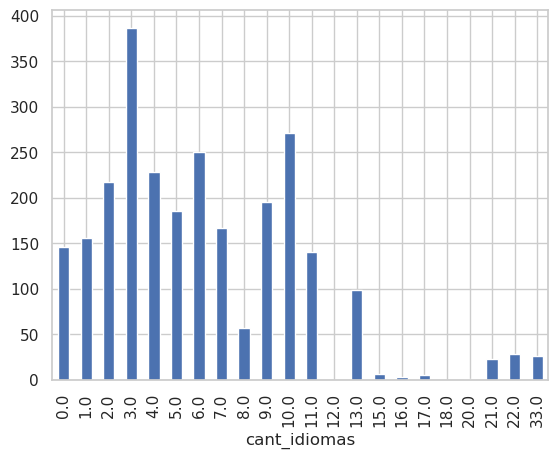

In [23]:
estadisticas_usuarios['promedio_agradecimiento'].plot.bar()

# Conclusion

Observamos que para la muestra de usuarios que editaron una de las versiones actuales del contenido, los usuarios con 3 idiomas son los que en promedio reciben mayor agradecimientos.

El promedio fue hallado como 

$$promedio = \frac{\textrm{suma de agradecimiento para personas con k idiomas}}{\textrm{numero de personas con k idiomas}}$$

siendo $k$ un numero entero que representa el numero de idiomas que domina una persona.